#Classificação dos Dados da Dermatologia em Python com Pacotes de Data Science
---
- Está codificação visa apresentar a classificação do dataset Dermatologia.
- São utilizado na classificação os pacotes: numpy, matplotlib, sklearn
- O algoritmo utilizado é kNN: Nearest Neighbors

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn import neighbors
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### Load na base de dados

In [0]:
#Carregamento do dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/wellingtondantas/Data-Science/master/Datasets/dermatology.csv")

In [0]:
#Apresenta o dataset
dataset

###Buscando informações iniciais do dataset

In [0]:
#Verificando a matriz dos dados
print(dataset.shape)

#Apresenta as primeiras linhas do dataset
print('\n', dataset.head(5))

#Apresenta as últimas linhas do dataset
print('\n', dataset.tail(5))

#Transformando em matriz para verificação de propriedades
base = np.array(dataset.values)
print('\n', base[0:5])

#Apresentação da quantidade de padrões
print('\n', len(base))

#Verifica a quantidade de classes diferentes
numClasses = np.unique(base[:,-1]).size
print('\n', numClasses)

#Mostrando quais as classes existentes
classes = np.unique(base[:,-1])
print('\n', classes)

#apresenta o balanceamento dos padrões
print('\n Número de Padrões por Classes')
for item in classes:
  print(' {0} : {1} : ({2:2.2f}%)'.format(item, sum(base[:,-1] == item), (sum(base[:,-1] == item)/len(base))*100 ))

###Tratamento de valores missing

In [0]:
#Mostra se existem valores nulos
print('\n', dataset.isnull().values.any())

#Mostra a quantidade de valores nulos por atributo
print('\n',dataset.isnull().sum())

#Excluir linhas (Não boa prática)
#dataset.dropna(subset=['age'], inplace=True)

#Extrair a mediana da coluna com valores missing (Boa Prática)
mediana_age = dataset.age.median()
dataset.age.fillna(mediana_age, inplace=True)

#Valor mais frequente da coluna com valores missing (Boa prática)
#freq_age = dataset.age.value_counts()
#dataset.age.fillna(freq_age, inplace=True)

#Mostra a quantidade de valores nulos por atributo
print('\n',dataset.isnull().sum())


###Buscando correlações e algumas visualizações iniciais

In [0]:
#Identificando a correlação entre as variáveis com os nomes das colunas
def plot_corr(dataset, size=7):
    corr = dataset.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

#Criando o gráfico
plot_corr(dataset)

#Visualizando a correlação em tabela numericamente
dataset.corr()

###Manipulação do Dataset

In [0]:


#Envia os dados dataset para um novo frame
d = dataset

#Apresentação da nova forma
d

In [0]:
d.columns[0:34]

In [54]:
# Seleção de atributos preditoras (Nem todos os atributos são importantes)
atributos = d.columns[0:34]

# Variável a ser prevista
rotulo = ['class']

# Criando objetos
X = d[atributos].values
Y = d[rotulo].values
print('\n', X[1:5])
print('\n', Y[1:5])


 [[ 3.  3.  3.  2.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  1.  2.  0.
   2.  2.  2.  2.  2.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  8.]
 [ 2.  1.  2.  3.  1.  3.  0.  3.  0.  0.  0.  1.  0.  0.  0.  1.  2.  0.
   2.  0.  0.  0.  0.  0.  2.  0.  2.  3.  2.  0.  0.  2.  3. 26.]
 [ 2.  2.  2.  0.  0.  0.  0.  0.  3.  2.  0.  0.  0.  3.  0.  0.  2.  0.
   3.  2.  2.  2.  2.  0.  0.  3.  0.  0.  0.  0.  0.  3.  0. 40.]
 [ 2.  3.  2.  2.  2.  2.  0.  2.  0.  0.  0.  1.  0.  0.  0.  1.  2.  0.
   0.  0.  0.  0.  0.  0.  2.  2.  3.  2.  3.  0.  0.  2.  3. 45.]]

 [[1]
 [3]
 [1]
 [3]]


In [59]:
X.shape[0]

366

In [0]:
#Função de normalização da matriz de dados
normalizar = lambda m : (m-m.min())/(m.max()-m.min())

#Normalização dos dados
for i in range(X.shape[1]):
    X[0:X.shape[0],i]=normalizar(X[0:X.shape[0],i])

print('\n', X[1:5])

#A função (train_test_split) os dados de treinamento e teste:  
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

#Apresentação das dimensões dos conjuntos criados
print('\n', X_train.shape) 
print('\n', Y_train.shape) 
print('\n', X_test.shape) 
print('\n', Y_test.shape)

print('\n')
#Verificando o balanceamento dos padrões de treinamento
for item, string in enumerate(classes):
  print(' {0} : {1} : ({2}%)'.format(string, sum(Y_train == item), (sum(Y_train == item)/(len(Y_train)))*100))

print('\n')
#Verificando o balanceamento dos padrões de teste
for item, string in enumerate(classes):
  print(' {0} : {1} : ({2}%)'.format(string, sum(Y_test == item), (sum(Y_test == item)/(len(Y_test)))*100))


###Classificação dos dados com kNN





In [61]:
#Parâmetros
realizacoes=20

#Matriz que vai salvar medidas de cada realização
medidas = np.zeros([realizacoes,1])

#Instância o classificador svm do pacote sklearn, 
#modelo = svm.SVC(gamma=.2, kernel='rbf', probability=True)
n_neighbors = 3
weights = 'distance'
modelo = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

for item in range(realizacoes):

  #Mistura os elementos do conjunto de padrões
  lista=list(range(len(Y_train)))
  random.shuffle(lista)
  X_train=X_train[lista, :]
  Y_train=Y_train[lista, :]

  #O método (fit) é a função de treinamento
  modelo.fit(X_train, Y_train)

  #O método (predict) é a função de predição
  classes = modelo.predict(X_test)

  #Calcula a acurácia para uma realização
  medidas[item] = metrics.accuracy_score(classes,Y_test)

  #Apresentação de resultados para uma realização
  print("Acurácia: %3.2f ---> %d realização" % (medidas[item], item+1))

Acurácia: 0.97 ---> 1 realização
Acurácia: 0.97 ---> 2 realização
Acurácia: 0.96 ---> 3 realização
Acurácia: 0.96 ---> 4 realização
Acurácia: 0.97 ---> 5 realização
Acurácia: 0.97 ---> 6 realização
Acurácia: 0.97 ---> 7 realização
Acurácia: 0.97 ---> 8 realização
Acurácia: 0.97 ---> 9 realização
Acurácia: 0.97 ---> 10 realização
Acurácia: 0.96 ---> 11 realização
Acurácia: 0.97 ---> 12 realização
Acurácia: 0.97 ---> 13 realização
Acurácia: 0.96 ---> 14 realização
Acurácia: 0.97 ---> 15 realização
Acurácia: 0.97 ---> 16 realização
Acurácia: 0.97 ---> 17 realização
Acurácia: 0.96 ---> 18 realização
Acurácia: 0.97 ---> 19 realização
Acurácia: 0.97 ---> 20 realização


###Apresentação de Resultados

In [70]:
#Apresenta valores estatísticos
medidas = pd.DataFrame(medidas, columns=['Medidas (%)'])
medidas.describe()*100

,Medidas (%)
count,2000.000000
mean,96.959459
std,0.600354
min,95.945946
25%,96.959459
50%,97.297297
75%,97.297297
max,97.297297


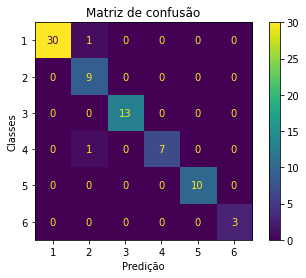

In [63]:
#A matrix de confusão apresenta aonde ocorreram os erros na predição
plot_confusion_matrix(modelo, X_test, Y_test)
plt.title('Matriz de confusão')
plt.ylabel('Classes')
plt.xlabel('Predição')
plt.show()

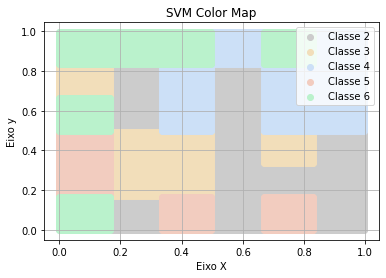

In [69]:
#Colunas selecionadas na análise
x1, x2 = 2 , 3

#Criando matrizes coletoras de pontos
color1, color2, color3, color4, color5, color6 = [], [], [], [], [], []

#Treinando
modelo.fit(np.array([X_train[:,x1], X_train[:,x2]]).T, Y_train)

#Criar os pontos de cores
for i in np.arange(0,1.0,0.005):
  for j in np.arange(0,1.0,0.005):

    y = modelo.predict(np.array([[i, j]]))

    if np.array_equal(y, [0]):
        color1.append([i,j])
    elif np.array_equal(y, [1]):
        color2.append([i,j])
    elif np.array_equal(y, [2]):
        color3.append([i,j])
    elif np.array_equal(y, [3]):
        color4.append([i,j])
    elif np.array_equal(y, [4]):
        color5.append([i,j])
    elif np.array_equal(y, [5]):
        color6.append([i,j])
    else:
        raise ValueError('Nenhuma Cor\n')

fig, ax = plt.subplots()
plt.title('kNN Color Map')
plt.xlabel('Eixo X')
plt.ylabel('Eixo y')

#Transforma lista em matrizes
color2 = np.array(color2)
color3 = np.array(color3)
color4 = np.array(color4)
color5 = np.array(color5)
color6 = np.array(color6)

ax.scatter(color2[:,0], color2[:,1], label='Classe 2', color=[0.80, 0.80, 0.80])
ax.scatter(color3[:,0], color3[:,1], label='Classe 3', color=[0.95, 0.87, 0.73])
ax.scatter(color4[:,0], color4[:,1], label='Classe 4', color=[0.80, 0.88, 0.97])
ax.scatter(color5[:,0], color5[:,1], label='Classe 5', color=[0.95, 0.80, 0.75])
ax.scatter(color6[:,0], color6[:,1], label='Classe 6', color=[0.73, 0.95, 0.80])
ax.legend()
ax.grid(True)
plt.show()